In [1]:
from scipy.stats.distributions import invgamma
from scipy.stats.distributions import expon
from scipy.special import gamma
import numpy as np
import matplotlib.pyplot as plt
import math

14


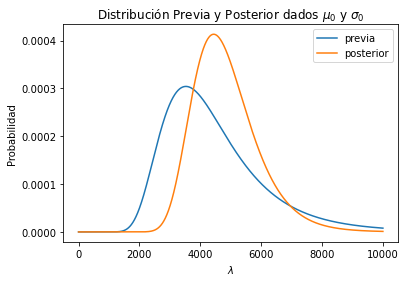

In [2]:
###Cuarto punto#####

plt.rcParams['text.usetex'] = False
alambres=np.array( (495,541,1461,1555,1603,2201,2750,3468,3516,4319,6622,7728,13159,21194) )#media 5043.714
n=len(alambres)
s=alambres.sum()
print(n)
a=33/4
b=32625
x = np.linspace(0, 10000, 10000)
preLambda=invgamma.pdf(x, a,scale=b)
posLambda=invgamma.pdf(x, a+n,scale=b+s)

plt.plot(x, preLambda, label='previa')
plt.plot(x, posLambda, label='posterior')
#Agregamos las etiquetas y añadimos una leyenda.
plt.xlabel(r'$\lambda$')
plt.ylabel('Probabilidad' )
plt.title(r"Distribución Previa y Posterior dados $\mu_0$ y $\sigma_0$")
plt.legend()
plt.savefig('previayposterior.png')
plt.show()

In [17]:
np.random.seed(1234)
B=500000
posLambda=invgamma.rvs(a+n,scale=b+s,size=B)
predicPos=np.empty(B)
for i in range(B):
    predicPos[i]=np.mean(expon.rvs(scale=posLambda[i],size=1))

In [19]:
##Posterior
print(round(np.mean(posLambda <4000), 8))
##Predictiva posterior
print(round(np.mean(predicPos <4000),8))

0.21511
0.570816


In [5]:
###Punto 8
lambada0=4000
B10=math.exp(( (a*math.log(b)-math.log(gamma(a)) ) +(math.log(gamma(a+n))-(a+n)*math.log(b+s) ))-(-n*math.log(lambada0)-(s/lambada0)))
print(B10)

0.7823909597529886


1.577069334084886e-98
1.8612498129883737e-98
1.1801952981784105


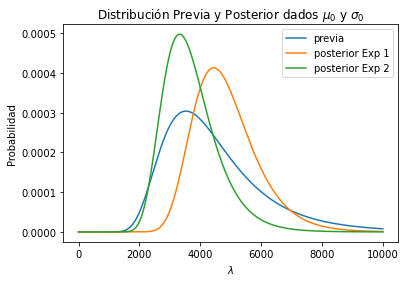

In [49]:
##### Punto 9 y 10 

alambres1=np.array( (495,541,1461,1555,1603,2201,2750,3468,3516,4319,6622,7728,13159,21194) )#media 5043.714
n1=len(alambres1)
s1=alambres1.sum()

alambres2=np.array((294,569,766,1576,1602,2015,2166,3885,8141,10285))
n2=len(alambres2)
s2=alambres2.sum()
a=33/4
b=32625
x = np.linspace(0, 10000, 10000)

##grafico Inicial comparativo
preLambda=invgamma.pdf(x, a,scale=b)

posLambda1=invgamma.pdf(x, a+n1,scale=b+s1)
posLambda2=invgamma.pdf(x, a+n2,scale=b+s2)
plt.plot(x, preLambda, label='previa')
plt.plot(x, posLambda1, label='posterior Exp 1')
plt.plot(x, posLambda2, label='posterior Exp 2')

B=50000
np.random.seed(1234)
lambdas=invgamma.rvs(a,scale=b,size=B)
############Hipotesisi nula#############
eLambdas=np.empty(B)
i=0
for j in lambdas:
    eLambdas[i]=math.e**(-(1/j)*(s1+s2))
    i=i+1
pH0=np.mean(lambdas**(-(n1+n2))*eLambdas)
print(pH0)
###############Hipotesis alterna#########

eLambdas1=np.empty(B)
i=0
for j in lambdas:
    eLambdas1[i]=math.e**(-(1/j)*(s1))
    i=i+1
    
eLambdas2=np.empty(B)
i=0
for j in lambdas:
    eLambdas2[i]=math.e**(-(1/j)*(s2))
    i=i+1

pH1=np.mean(lambdas**(-n1)*eLambdas1)*np.mean(lambdas**(-n2)*eLambdas2)
print(pH1)
B10=math.exp(math.log(pH1)-math.log(pH0))
print(B10)

#Agregamos las etiquetas y añadimos una leyenda.
plt.xlabel(r'$\lambda$')
plt.ylabel('Probabilidad' )
plt.title(r"Distribución Previa y Posterior dados $\mu_0$ y $\sigma_0$")
plt.legend()
plt.savefig('previayposterior-9.png')
plt.show()